In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('Online Sales Data.csv')

In [77]:
df.shape

(240, 9)

In [78]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [79]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [83]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [84]:
df.describe(include='all')

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
count,240.00000,240,240,240,240.000000,240.000000,240.000000,240,240
unique,NaN,NaN,6,232,NaN,NaN,NaN,3,3
top,NaN,NaN,Electronics,Dyson Supersonic Hair Dryer,NaN,NaN,NaN,North America,Credit Card
freq,NaN,NaN,40,2,NaN,NaN,NaN,80,120
mean,10120.50000,2024-04-29 12:00:00,NaN,NaN,2.158333,236.395583,335.699375,NaN,NaN
min,10001.00000,2024-01-01 00:00:00,NaN,NaN,1.000000,6.500000,6.500000,NaN,NaN
25%,10060.75000,2024-02-29 18:00:00,NaN,NaN,1.000000,29.500000,62.965000,NaN,NaN
50%,10120.50000,2024-04-29 12:00:00,NaN,NaN,2.000000,89.990000,179.970000,NaN,NaN
75%,10180.25000,2024-06-28 06:00:00,NaN,NaN,3.000000,249.990000,399.225000,NaN,NaN
max,10240.00000,2024-08-27 00:00:00,NaN,NaN,10.000000,3899.990000,3899.990000,NaN,NaN


# Visualization

## Sales trends over time


In [85]:
sales_trends = df.groupby('Date')['Total Revenue'].sum().reset_index()

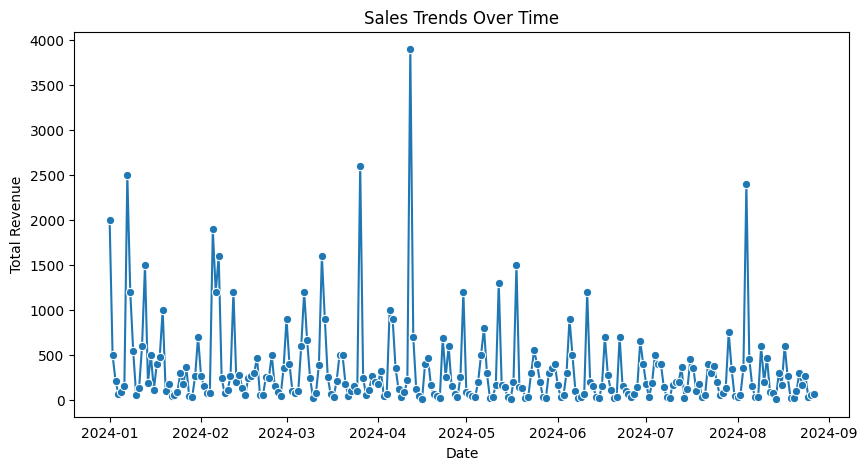

In [86]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_trends, x='Date', y='Total Revenue', marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

In [87]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

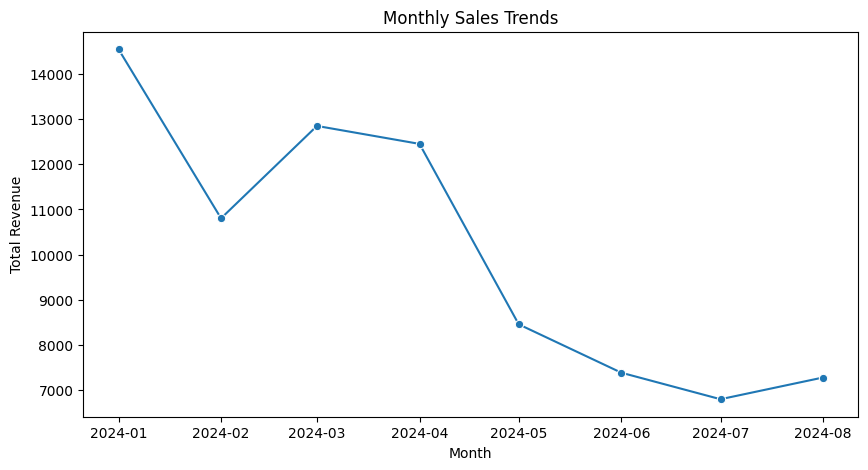

In [88]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales['Month'], y=monthly_sales['Total Revenue'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

## Product category popularity across regions

In [89]:
category_region_sales = df.pivot_table(index='Region', columns='Product Category', values='Total Revenue', aggfunc='sum')
category_region_sales.reset_index(inplace=True)

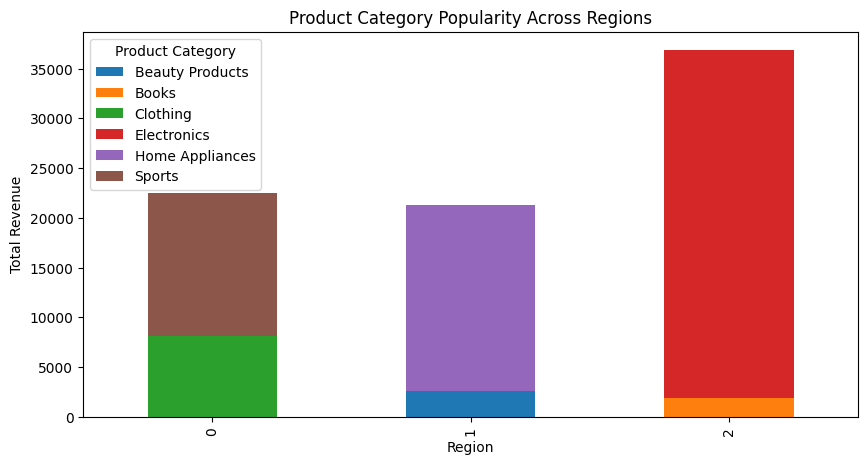

In [90]:
category_region_sales.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Product Category Popularity Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.show()

## Impact of payment methods on sales

In [91]:
payment_method_sales = df.groupby('Payment Method')['Total Revenue'].sum().reset_index()

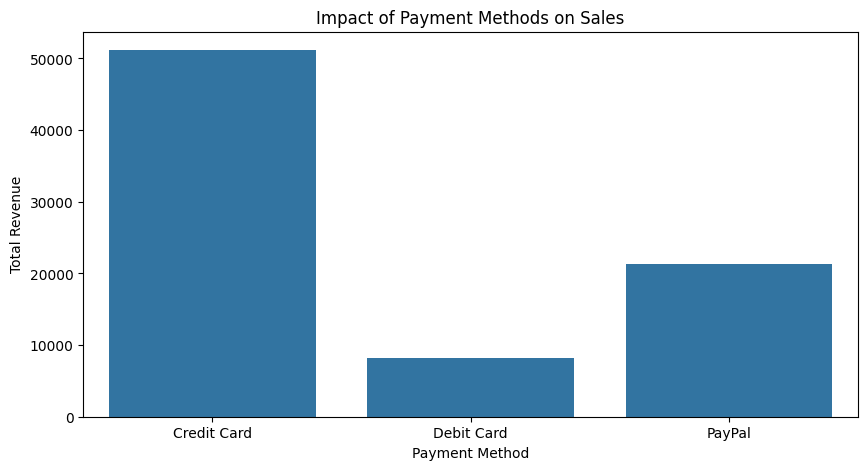

In [92]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Payment Method', y='Total Revenue', data=payment_method_sales)
plt.title('Impact of Payment Methods on Sales')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.show()

## Top-Selling products within each category

In [93]:
top_products = df.groupby(['Product Category', 'Product Name'])['Total Revenue'].sum().reset_index()
top_products = top_products.sort_values(by='Total Revenue', ascending=False).groupby('Product Category').head(10)

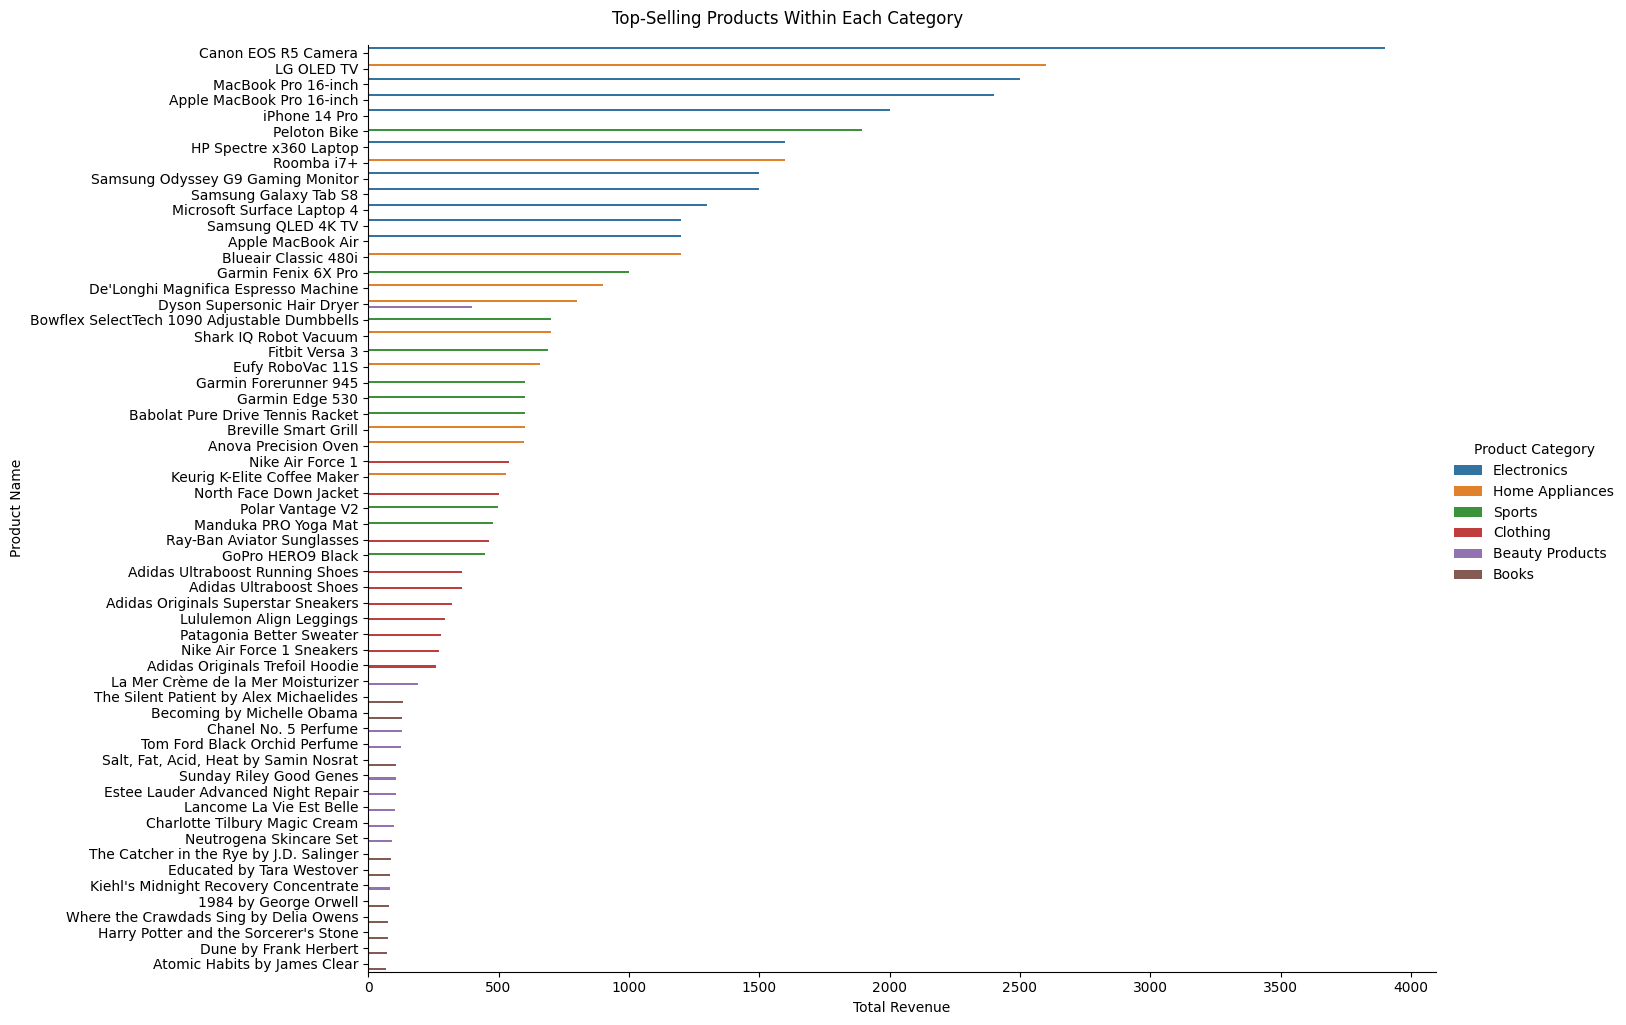

In [94]:
x = sns.catplot(x='Total Revenue', y='Product Name', hue='Product Category', data=top_products, kind='bar', height=10, aspect=1.5)
x.fig.suptitle('Top-Selling Products Within Each Category', y=1.02)
x.set_axis_labels('Total Revenue', 'Product Name')
plt.show()

## Performance of products/categories in different regions

In [95]:
category_region_performance = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().reset_index()

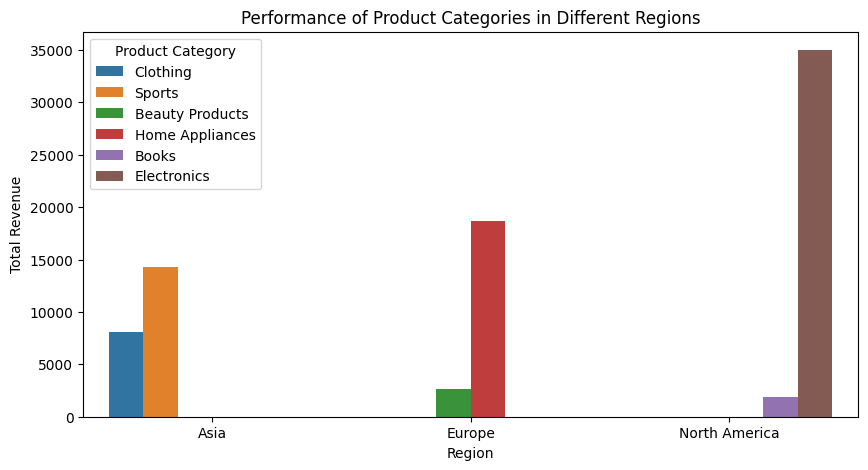

In [96]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Total Revenue', hue='Product Category', data=category_region_performance)
plt.title('Performance of Product Categories in Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.show()